<a href="https://colab.research.google.com/github/WontonSoup914/MLStuff/blob/main/Classify_IMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Version Control

In [2]:
#useful imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__) #version control

2.6.0


# Load Dataset + Specs

In [4]:
fashionMNIST = tf.keras.datasets.fashion_mnist
(trainImages, trainLabels), (testImages, testLabels) = fashionMNIST.load_data()

4431872/4422102 [==============================] - 0s 0us/step


**Class Names**

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Training Dataset Specs**

In [6]:
print(trainImages.shape, len(trainLabels))

(60000, 28, 28) 60000


In [7]:
print(trainLabels)

[9 0 0 ... 3 0 5]


**Testing Dataset Specs**

In [8]:
print(testImages.shape, len(testLabels))

(10000, 28, 28) 10000


# Preprocessing Data

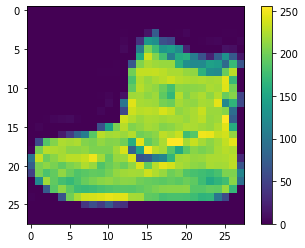

In [10]:
plt.figure()
plt.imshow(trainImages[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
trainImages = trainImages / 255.0

testImages = testImages / 255.0

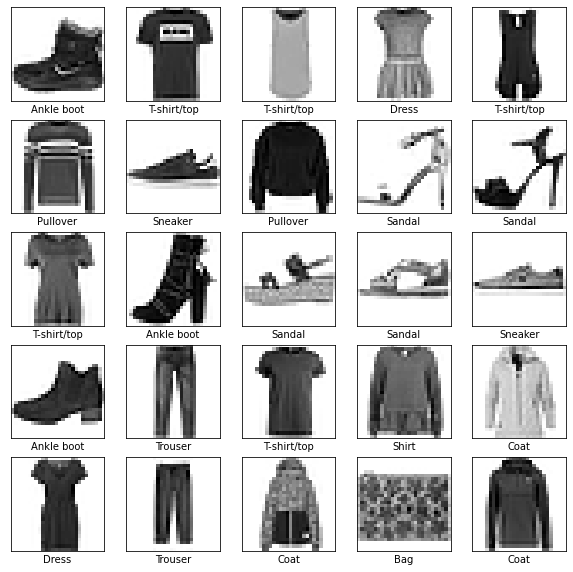

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainLabels[i]])
plt.show()

# Build the Model

**Set up the Layers**

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Train the Model**

In [19]:
model.fit(trainImages, trainLabels, epochs=69)

Epoch 1/69
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4977 - accuracy: 0.8249
Epoch 2/69
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3759 - accuracy: 0.8643
Epoch 3/69
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3394 - accuracy: 0.8766
Epoch 4/69
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3133 - accuracy: 0.8851
Epoch 5/69
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2979 - accuracy: 0.8892
Epoch 6/69
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2796 - accuracy: 0.8967
Epoch 7/69
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2694 - accuracy: 0.8998
Epoch 8/69
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2589 - accuracy: 0.9027
Epoch 9/69
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2481 - accuracy: 0.9074
Epoch 10/69
1875/1875 [==============================] - 4s 2ms/step - loss: 0.241

In [20]:
testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=2)
print('\nTest accuracy:', testAcc)

313/313 - 0s - loss: 0.7068 - accuracy: 0.8756

Test accuracy: 0.8755999803543091


**Make Predictions**

In [21]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(testImages)

In [23]:
predictions[0], predictions[1], predictions[69]

(array([7.3047222e-22, 1.5898780e-36, 1.4671655e-19, 6.7481876e-38,
        4.2714549e-27, 2.4714289e-10, 6.1260443e-29, 8.0846183e-07,
        3.7122079e-20, 9.9999917e-01], dtype=float32),
 array([4.5195656e-10, 1.7293467e-32, 1.0000000e+00, 6.3654243e-20,
        6.3515278e-12, 9.2996138e-30, 3.6086025e-09, 3.5826962e-37,
        1.2237050e-19, 1.7203570e-34], dtype=float32),
 array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.3087960e-38, 3.1204145e-38, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00], dtype=float32))

In [24]:
np.argmax(predictions[0]), np.argmax(predictions[1]), np.argmax(predictions[69])

(9, 2, 8)

In [25]:
testLabels[0], testLabels[1], testLabels[69]

(9, 2, 8)

In [26]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

**Verify Predictions**

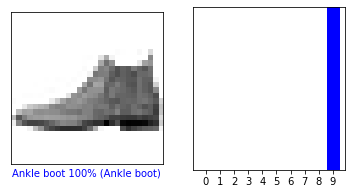

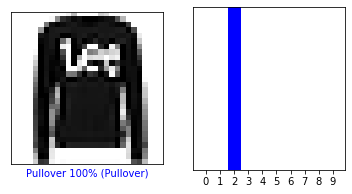

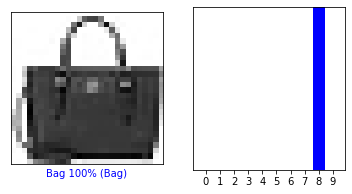

In [29]:
for i in [0, 1, 69]:
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], testLabels, testImages)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  testLabels)
  plt.show()

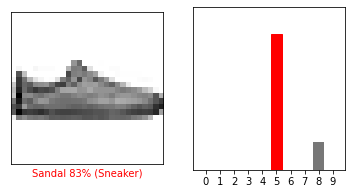

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], testLabels, testImages)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  testLabels)
plt.show()

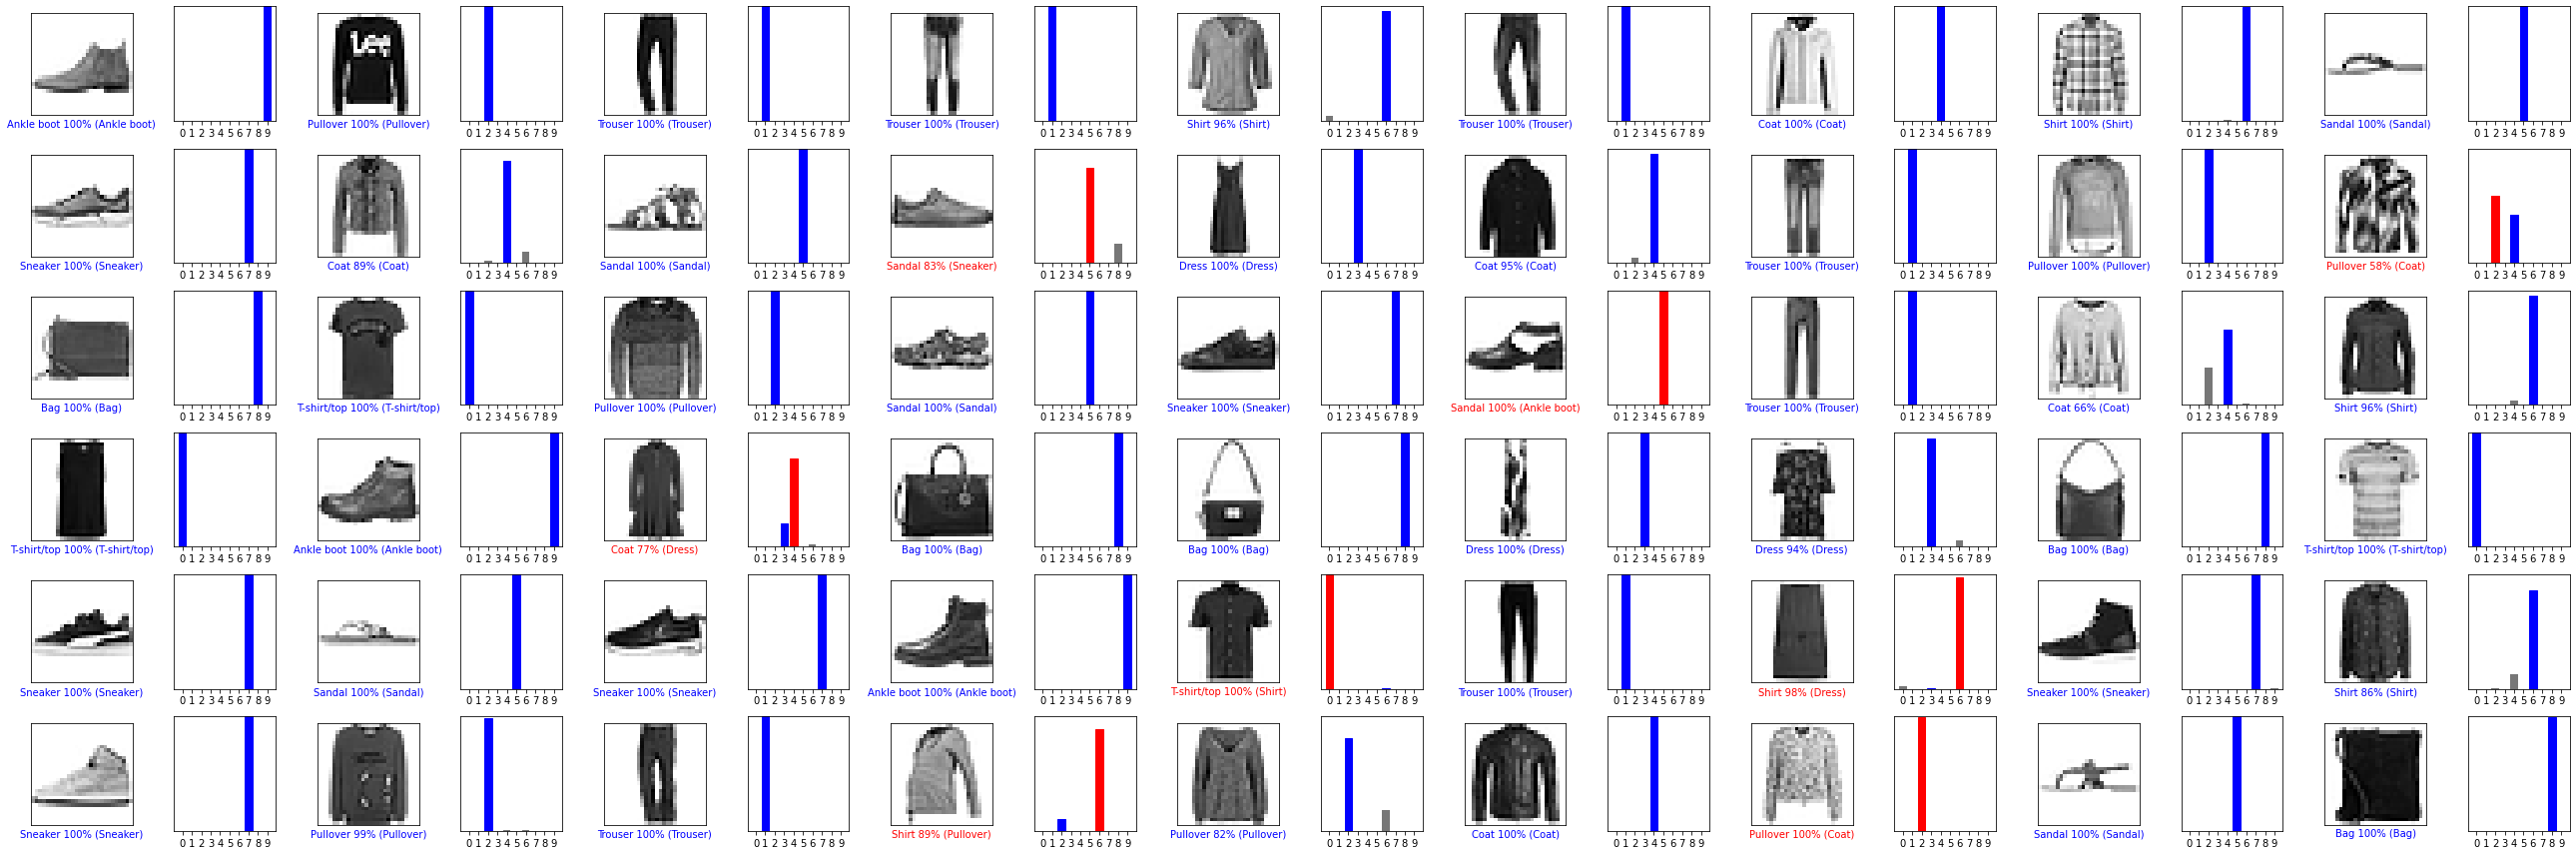

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 6
num_cols = 9
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], testLabels, testImages)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], testLabels)
plt.tight_layout()
plt.show()

**Use the Trained Model**

In [38]:
# Grab an image from the test dataset.
img = testImages[1]

print(img.shape)

(28, 28)


In [39]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [40]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.5195828e-10 1.7293598e-32 1.0000000e+00 6.3654734e-20 6.3515400e-12
  9.2995423e-30 3.6086094e-09 3.5826141e-37 1.2237050e-19 1.7203570e-34]]


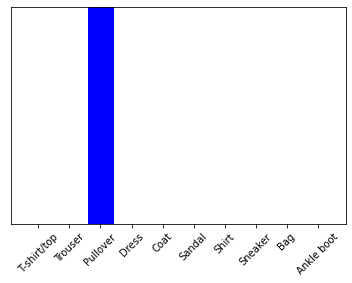

In [42]:
plot_value_array(1, predictions_single[0], testLabels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [43]:
np.argmax(predictions_single[0])

2

In [44]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.